In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [3]:
Seoul_bicycle_rental_history = pd.read_csv('Seoul_bicycle_rental_history.csv', encoding='cp949')
Seoul_bicycle_rental_history.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-40983,2023-12-01 00:01:40,1295,잠실역 8번출구,0,2023-12-01 00:01:55,01295,잠실역 8번출구,0,0,0.29,2005,M,내국인,ST-1584,ST-1584,일반자전거
1,SPB-32323,2023-12-01 00:00:41,2191,대학동주민센터,0,2023-12-01 00:02:24,02183,동방1교,0,1,318.46,1955,M,내국인,ST-2375,ST-1678,일반자전거
2,SPB-57089,2023-12-01 00:01:28,3819,서울대벤처타운역,0,2023-12-01 00:02:55,02139,서울신성초등학교,0,1,310.00,1998,M,내국인,ST-3143,ST-951,일반자전거
3,SPB-40646,2023-12-01 00:00:41,487,신석초교앞 교차로 교통섬,0,2023-12-01 00:03:13,00148,용강동 주민센터 앞,0,2,264.50,1965,\N,내국인,ST-2146,ST-206,일반자전거
4,SPB-69399,2023-12-01 00:00:21,3658,프라이어팰리스아파트,0,2023-12-01 00:03:40,03698,명일역 3번출구 옆,0,3,730.00,1985,M,내국인,ST-2733,ST-3085,일반자전거


In [4]:
history = Seoul_bicycle_rental_history.copy()

In [5]:
history = history.rename(columns={"대여 대여소명": "location"})

In [6]:
rental_cnt = history['location'].value_counts().reset_index()
rental_cnt

,location,count
0,마곡나루역 2번 출구,10803
1,마곡나루역 5번출구 뒤편,6945
2,마곡나루역 3번 출구,6158
3,"발산역 1번, 9번 인근 대여소",5740
4,롯데월드타워(잠실역2번출구 쪽),5328
...,...,...
2724,왕십리 자이아파트(101동 앞),12
2725,헌인릉 입구,10
2726,서울신우초등학교,8
2727,우면산등산로 입구,8


In [7]:
top10_rental = rental_cnt.head(10)
top10_rental

,location,count
0,마곡나루역 2번 출구,10803
1,마곡나루역 5번출구 뒤편,6945
2,마곡나루역 3번 출구,6158
3,"발산역 1번, 9번 인근 대여소",5740
4,롯데월드타워(잠실역2번출구 쪽),5328
5,영등포구청역 1번출구,5202
6,구로디지털단지역 앞,4774
7,신대방역 2번 출구,4364
8,봉림교 교통섬,4136
9,발산역 6번 출구 뒤,4124


In [11]:
font_list = [font.name for font in fm.fontManager.ttflist]

filtered_words = [word for word in font_list if word.startswith('N')]
filtered_words

['NewJumja', 'Nirmala UI', 'Nirmala UI', 'Nirmala UI']

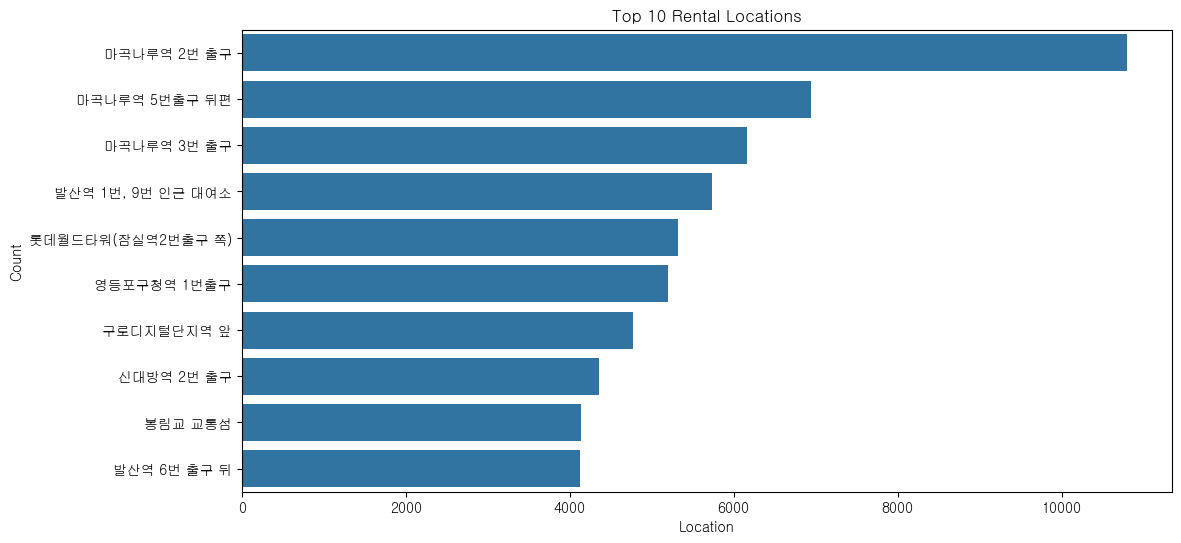

In [15]:
plt.rcParams['font.family'] = 'GULIM'
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='location', data=top10_rental)
plt.title('Top 10 Rental Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()